In [1]:
# standard imports
import copy
import os
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# lenstronomy module import
import lenstronomy.Util.data_util as data_util
from lenstronomy.Cosmo.lens_cosmo import LensCosmo
import lenstronomy.Plots.plot_util as plot_util
from lenstronomy.SimulationAPI.sim_api import SimAPI
from lenstronomy.LightModel.Profiles.gaussian import GaussianEllipse
from lenstronomy.LensModel import convergence_integrals
from lenstronomy.Util import constants 
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.Util import util
gauss = GaussianEllipse()

# skypy imports
import skypy
from skypy.pipeline import Pipeline

import requests
import h5py

# ILLUSTRIS PART

## API Key & Illustris-1

In [2]:
baseUrl = 'http://www.illustris-project.org/api/'
headers = {"api-key" : "573c11388273b0124c248d53c4521fe9"}

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

In [3]:
r = get(baseUrl)
names = [sim['name'] for sim in r['simulations']]
i = names.index('Illustris-1')
sim = get( r['simulations'][i]['url'] )

## Snapshots

In [4]:
snaps = get( sim['snapshots'] )
snap = get( snaps[83]['url'] )
snap ## 85th snapshot = 0.5 redshift

{'simulation': 'http://www.illustris-project.org/api/Illustris-1/',
 'number': 85,
 'redshift': 0.9972942257819399,
 'num_gas': 5482365381,
 'num_dm': 6028568000,
 'num_trmc': 6028568000,
 'num_stars': 376954302,
 'num_bhs': 30739,
 'num_groups_fof': 6148794,
 'num_groups_subfind': 5036992,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 1638856308152.0,
 'filesize_groupcat': 4824066184.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.illustris-project.org/api/Illustris-1/snapshots/85/',
 'subhalos': 'http://www.illustris-project.org/api/Illustris-1/snapshots/85/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.illustris-project.org/api/Illustris-1/snapshots/85/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.illustris-project.org/api/Illustris-1/snapshots/85/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.illustris-project.org/api/Illustris-1/snapshots/85/subhalos/plot.png?xQuant=mstar2_log&

### Is it necessary?

In [5]:
subs = get( snap['subhalos'] )
subs = get( snap['subhalos'], {'limit':5000} )
subs = get( snap['subhalos'], {'limit':20, 'order_by':'-mass_stars'} )
sub = get( subs['results'][1]['url'] )
url = sub['related']['parent_halo'] + "info.json"
parent_fof = get(url)

In [6]:
def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)
    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    
    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string
    return r

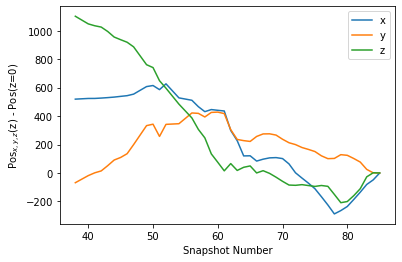

In [7]:
mpb1 = get( sub['trees']['sublink_mpb'] ) 
mpb2 = get( sub['trees']['lhalotree_mpb'] )
with h5py.File(mpb2,'r') as f:
    pos = f['SubhaloPos'][:]
    snapnum = f['SnapNum'][:]
    subid = f['SubhaloNumber'][:]
    
for i in range(3):
    plt.plot(snapnum, pos[:,i] - pos[0,i], label=['x','y','z'][i])
plt.legend()
plt.xlabel('Snapshot Number')
plt.ylabel('Pos$_{x,y,z}$(z) - Pos(z=0)'); 

## Redshift = 1.0

In [8]:
url = sim['snapshots'] + "z=1/"
snap = get(url)
i = np.where(snapnum == 85)
subid[i]

array([9122], dtype=int32)

## 30th Subhalo

In [9]:
sub_prog_url = "http://www.illustris-project.org/api/Illustris-1/snapshots/85/subhalos/30/"
sub_prog = get(sub_prog_url)

In [10]:
sub_prog

{'snap': 85,
 'id': 30,
 'bhmdot': 1.20595e-05,
 'cm_x': 1587.74,
 'cm_y': 28139.1,
 'cm_z': 19909.7,
 'gasmetallicity': 0.0115234,
 'gasmetallicityhalfrad': 0.0169171,
 'gasmetallicitymaxrad': 0.00940767,
 'gasmetallicitysfr': 0.01403,
 'gasmetallicitysfrweighted': 0.0149763,
 'pos_x': 1591.09,
 'pos_y': 28138.2,
 'pos_z': 19908.1,
 'halfmassrad': 28.5825,
 'halfmassrad_gas': 26.9596,
 'halfmassrad_dm': 30.1497,
 'halfmassrad_stars': 9.72,
 'halfmassrad_bhs': 0.0,
 'len': 43033,
 'len_gas': 16484,
 'len_dm': 20064,
 'len_stars': 6484,
 'len_bhs': 1,
 'mass': 11.0796,
 'mass_gas': 1.82855,
 'mass_dm': 8.84615,
 'mass_stars': 0.404688,
 'mass_bhs': 0.000245,
 'massinhalfrad': 1.45259,
 'massinhalfrad_gas': 0.243444,
 'massinhalfrad_dm': 1.00657,
 'massinhalfrad_stars': 0.20234,
 'massinhalfrad_bhs': 0.000245,
 'massinmaxrad': 5.3391,
 'massinmaxrad_gas': 0.937762,
 'massinmaxrad_dm': 4.02715,
 'massinmaxrad_stars': 0.373945,
 'massinmaxrad_bhs': 0.000245,
 'massinrad': 3.62352,
 'massin

In [11]:
cutout_request = {'dm':'Coordinates,SubfindDensity'}
cutout = get(sub_prog_url+"cutout.hdf5", cutout_request)
f = h5py.File(cutout,'r') 

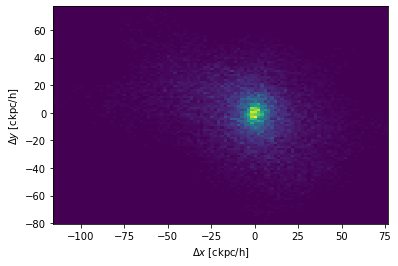

In [12]:
with h5py.File(cutout,'r') as f:
    corx = f['PartType1']['Coordinates'][:,0]- sub_prog['pos_x']
    cory = f['PartType1']['Coordinates'][:,1]- sub_prog['pos_y']
    corz = f['PartType1']['Coordinates'][:,2]- sub_prog['pos_z']
    dens = np.log10(f['PartType1']['SubfindDensity'][:]*1e10/0.704)
    
plt.hist2d(corx, cory,weights=dens, density=True, bins=[100,100])
plt.xlabel('$\Delta x$ [ckpc/h]')
plt.ylabel('$\Delta y$ [ckpc/h]');

In [13]:
corx

array([ -0.57466914,  -0.42097485,   0.35702985, ..., -11.59998996,
       -20.44239314,  -4.41232345])

## Mass Map

9.89763495317866


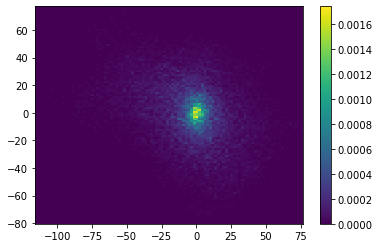

In [14]:
w = plt.hist2d(corx, cory,weights=dens, density=True, bins=[100,100])
plt.colorbar()
mass_map = w[0]
print(np.sum(mass_map*30))
# SB: If this is a mass map, it has very little mass!!! I don't know the units but this can't be right. For lenstronomy, you need physical solar masses.


## Massed and Coordinates from All Subhalos

In [20]:
m = []
l_cx = []
l_cy = []
l_cz = []
for i in range(100):
    mass = get("https://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/" + str(i) + "/")["mass_dm"]
    m.append(mass)
    posx = get("https://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/" + str(i) + "/")["pos_x"] - get("https://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/" + str(i) + "/")["cm_x"]
    l_cx.append(posx)
    posy = get("https://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/" + str(i) + "/")["pos_y"] - get("https://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/" + str(i) + "/")["cm_y"]
    l_cy.append(posy)
    posz = get("https://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/" + str(i) + "/")["pos_z"] - get("https://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/" + str(i) + "/")["cm_z"]
    l_cz.append(posz)

In [21]:
m_msun = [np.log10(item *(1e10/0.704)) for item in m]

### Little Trial

In [22]:
m_trial = []
for i in range(100):
    mass = get("https://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/")["results"][i]["mass_log_msun"]
    m_trial.append(mass)

In [ ]:
get("https://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/")["results"][0]

In [ ]:
def rotate_project(x, y, z, theta_x, theata_y, theta_z):
    """
    rotates with the three Euler angles and projects in the z'-axis after rotation
    See e.g. https://en.wikipedia.org/wiki/3D_projection#Perspective_projection
    """
    c_x, s_x = np.cos(theta_x), np.sin(theta_x)
    c_y, s_y = np.cos(theta_y), np.sin(theta_y)
    c_z, s_z = np.cos(theta_z), np.sin(theta_z)
    x_ = c_y * (s_z * y + c_z * x) - s_y * z
    y_ = s_x * (c_y * z + s_y * (s_z * y + c_z * x)) + c_x * (c_z * y - s_z * x)
    return x_, y_


theta_x = 0.
theta_y = 0.
theta_z = 0

x_, y_ = rotate_project(f_short_492['203']['pos'][:,0], 
                       f_short_492['203']['pos'][:,1], 
                       f_short_492['203']['pos'][:,2], theta_x, theta_y, theta_z)

# here we generate a mass-density map on a grid using np.histogram2d to do so (there might be better ways...)


# determine grid size, this assumes centering is done to (0,0) and assures a rectangular grid in the histogram
range_min = min(np.min(x_), np.min(y_))
range_max = max(np.max(x_), np.max(y_))


# perform historgram with density (incl. normalization)
n_bins = 2000  # number of equally spaced bins for convergence map
mass_density_map, xedges, yedges = np.histogram2d(x_, y_, bins=[n_bins, n_bins], 
                                                     range=[[range_min, range_max], [range_min, range_max]],
                                                    weights=f_short_492['203']['mass'])
grid_spacing = (xedges[1] - xedges[0]) / 1000  # grid spacing in units physical Mpc

In [23]:
def rotate_project(x, y, z, theta_x, theata_y, theta_z):
    """
    rotates with the three Euler angles and projects in the z'-axis after rotation
    See e.g. https://en.wikipedia.org/wiki/3D_projection#Perspective_projection
    """
    c_x, s_x = np.cos(theta_x), np.sin(theta_x)
    c_y, s_y = np.cos(theta_y), np.sin(theta_y)
    c_z, s_z = np.cos(theta_z), np.sin(theta_z)
    x_ = c_y * (s_z * y + c_z * x) - s_y * z
    y_ = s_x * (c_y * z + s_y * (s_z * y + c_z * x)) + c_x * (c_z * y - s_z * x)
    return x_, y_


theta_x = 0.
theta_y = 0.
theta_z = 0

x_, y_ = rotate_project(np.asarray(l_cx), 
                       np.asarray(l_cy), 
                       np.asarray(l_cz), theta_x, theta_y, theta_z)

# here we generate a mass-density map on a grid using np.histogram2d to do so (there might be better ways...)


# determine grid size, this assumes centering is done to (0,0) and assures a rectangular grid in the histogram
range_min = min(np.min(x_), np.min(y_))
range_max = max(np.max(x_), np.max(y_))


# perform historgram with density (incl. normalization)
n_bins = 2000  # number of equally spaced bins for convergence map
mass_density_map, xedges, yedges = np.histogram2d(x_, y_, bins=[n_bins, n_bins], 
                                                     range=[[range_min, range_max], [range_min, range_max]],
                                                    weights=np.asarray(m_trial))
grid_spacing = (xedges[1] - xedges[0]) / 1000  # grid spacing in units physical Mpc

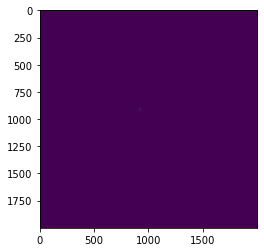

In [156]:
plt.imshow(mass_density_map*10**12)

In [153]:
np.amax(mass_density_map)

24.052936899192808

In [154]:
np.mean(mass_density_map)

0.00029004499983793493

In [138]:
mass_density_map.shape

(2000, 2000)

# LENSTRONOMY PART

## Light Cone Class

In [24]:
from lenstronomy.Util import util
from lenstronomy.LensModel import convergence_integrals
import numpy as np
from lenstronomy.Util import constants as const
from lenstronomy.Cosmo.lens_cosmo import LensCosmo
from lenstronomy.LensModel.lens_model import LensModel

__all__ = ['LightCone', 'MassSlice']


class LightCone(object):
    """
    class to perform multi-plane ray-tracing from convergence maps at different redshifts
    From the convergence maps the deflection angles and lensing potential are computed (from different settings)
    and then an interpolated grid of all those quantities generate an instance of the lenstronomy LensModel multi-plane
    instance. All features of the LensModel module are supported.
    Improvements that can be made for accuracy and speed:
    1. adaptive mesh integral for the convergence map
    2. Interpolated deflection map on different scales than the mass map.
    The design principles should allow those implementations 'under the hook' of this class.
    """

    def __init__(self, mass_map_list, grid_spacing_list, redshift_list):
        """
        :param mass_map_list: 2d numpy array of mass map
         (in units physical Solar masses enclosed in each pixel/gird point of the map)
        :param grid_spacing_list: list of grid spacing of the individual mass maps
         in units of physical Mpc
        :param redshift_list: list of redshifts of the mass maps
        """
        self._mass_slice_list = []
        for i in range(len(mass_map_list)):
            self._mass_slice_list.append(MassSlice(mass_map_list[i], grid_spacing_list[i], redshift_list[i]))
        self._mass_map_list = mass_map_list
        self._grid_spacing_list = grid_spacing_list
        self._redshift_list = redshift_list

    def cone_instance(self, z_source, cosmo, multi_plane=True, kwargs_interp=None):
        """
        :param z_source: redshift to where lensing quantities are computed
        :param cosmo: astropy.cosmology class
        :param multi_plane: boolean, if True, computes multi-plane ray-tracing
        :param kwargs_interp: interpolation keyword arguments specifying the numerics.
         See description in the Interpolate() class. Only applicable for 'INTERPOL' and 'INTERPOL_SCALED' models.
        :return: LensModel instance, keyword argument list of lens model
        """
        lens_model = LensModel(lens_model_list=['INTERPOL'] * len(self._mass_map_list),
                               lens_redshift_list=self._redshift_list, multi_plane=multi_plane,
                               z_source_convention=z_source, cosmo=cosmo, z_source=z_source,
                               kwargs_interp=kwargs_interp)
        kwargs_lens = []
        for mass_slice in self._mass_slice_list:
            kwargs_lens.append(mass_slice.interpol_instance(z_source, cosmo))
        return lens_model, kwargs_lens


class MassSlice(object):
    """
    class to describe a single mass slice
    """
    def __init__(self, mass_map, grid_spacing, redshift):
        """
        :param mass_map: 2d numpy array of mass map (in units physical Msol)
        :param grid_spacing: grid spacing of the mass map (in units physical Mpc)
        :param redshift: redshift
        """
        nx, ny = np.shape(mass_map)
        if nx != ny:
            raise ValueError('Shape of mass map needs to be square!, set as %s %s' % (nx, ny))
        self._mass_map = mass_map
        self._grid_spacing = grid_spacing
        self._redshift = redshift
        self._f_x_mass, self._f_y_mass = convergence_integrals.deflection_from_kappa_grid(self._mass_map,
                                                                                          self._grid_spacing)
        self._f_mass = convergence_integrals.potential_from_kappa_grid(self._mass_map, self._grid_spacing)
        x_grid, y_grid = util.make_grid(numPix=len(self._mass_map), deltapix=self._grid_spacing)
        self._x_axes_mpc, self._y_axes_mpc = util.get_axes(x_grid, y_grid)

    def interpol_instance(self, z_source, cosmo):
        """
        scales the mass map integrals (with units of mass not convergence) into a convergence map for the given
        cosmology and source redshift and returns the keyword arguments of the interpolated reduced deflection and
        lensing potential.
        :param z_source: redshift of the source
        :param cosmo: astropy.cosmology instance
        :return: keyword arguments of the interpolation instance with numerically computed deflection angles and lensing
         potential
        """
        lens_cosmo = LensCosmo(z_lens=self._redshift, z_source=z_source, cosmo=cosmo)
        mpc2arcsec = lens_cosmo.dd * const.arcsec
        x_axes = self._x_axes_mpc / mpc2arcsec  # units of arc seconds in grid spacing
        y_axes = self._y_axes_mpc / mpc2arcsec  # units of arc seconds in grid spacing

        f_ = self._f_mass / lens_cosmo.sigma_crit_angle / self._grid_spacing ** 2
        f_x = self._f_x_mass / lens_cosmo.sigma_crit_angle / self._grid_spacing ** 2 * mpc2arcsec
        f_y = self._f_y_mass / lens_cosmo.sigma_crit_angle / self._grid_spacing ** 2 * mpc2arcsec
        kwargs_interp = {'grid_interp_x': x_axes, 'grid_interp_y': y_axes, 'f_': f_, 'f_x': f_x, 'f_y': f_y}
        return kwargs_interp

## Kwargs Lens

In [25]:
kwargs_model = {'lens_model_list': ['INTERPOL'],  # list of lens models to be used
                'lens_light_model_list': ['SERSIC_ELLIPSE'],  # list of unlensed light models to be used
                'source_light_model_list': ['SERSIC_ELLIPSE'],  # list of extended source models to be used
                'point_source_model_list': ['SOURCE_POSITION']  # list of point source models to be used
    }

In [26]:
# we define a specific cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Ob0=0.05)

In [72]:
mass_map = mass_map
print(np.log10(np.sum(mass_map)))
#grid_spacing = w[1][1] - w[1][0] # SB: this is in units of comoving kpc, correct?
redshift = 0.3
z_source = 1
numpix = 100


# SB: this line failed
# mass_map_list = [mass_map_list[0]*(10**13)*1e10 * 0.704/np.linalg.norm(mass_map_list[0]*(10**13)*1e10 * 0.704)]
# SB: I have no idea what units and convergence you are using here???
# each element in the mass map should have mass in units of Msun. If I sum up all the mass, I get 38 solar masses. This can not be correct
#mass_map_list = [mass_map*(30)*1e10 * 0.704/np.linalg.norm(mass_map*(30)*1e10 * 0.704)]

# SB: this is in units of comoving kpc, correct? If so, you need to convert it into physical Mpc, otherwise the scales in lenstronomy are off
# grid_spacing_list = [grid_spacing]

grid_spacing_list = [grid_spacing / 1000 / (1 + redshift)]  # here we convert comoving kpc to physical Mpc

redshift_list = [redshift]

-0.4815898226969116


In [27]:
mass_map_list = [mass_density_map*(10**12)]
grid_spacing_list = [grid_spacing]
redshift = 0.5
z_source = 1
numpix = 100
redshift_list = [redshift]

In [28]:
np.sum(mass_map_list[0])

1160179999351739.8

In [29]:
www = []
for i in [LightCone(mass_map_list, grid_spacing_list, redshift_list)]:
    www.append(i.cone_instance(z_source, cosmo))
    
kwargs_lens = www[0][1]

In [30]:
kwargs_lens[0]

{'grid_interp_x': array([-10.19278166, -10.18258378, -10.1723859 , ...,  10.1723859 ,
         10.18258378,  10.19278166]),
 'grid_interp_y': array([-10.19278166, -10.18258378, -10.1723859 , ...,  10.1723859 ,
         10.18258378,  10.19278166]),
 'f_': array([[-2498.91289366, -2500.65686148, -2502.40083136, ...,
         -2224.08226387, -2222.36749063, -2220.65295277],
        [-2500.66017739, -2502.40604291, -2504.15191257, ...,
         -2225.55899799, -2223.84266936, -2222.12657796],
        [-2502.40745493, -2504.15522018, -2505.90299168, ...,
         -2227.03549599, -2225.31761085, -2223.59996481],
        ...,
        [-2244.70916233, -2246.14166871, -2247.57364035, ...,
         -1966.30578382, -1964.84693166, -1963.38804654],
        [-2242.90846647, -2244.33944069, -2245.76988045, ...,
         -1964.81695476, -1963.35943452, -1961.90188017],
        [-2241.10830319, -2242.53774714, -2243.96665689, ...,
         -1963.32816103, -1961.87197148, -1960.41574668]]),
 'f_x': arr

# SKYPY PART

In [31]:
# Instrument setting from pre-defined configurations

from lenstronomy.SimulationAPI.ObservationConfig.DES import DES

DES_g = DES(band='g', psf_type='GAUSSIAN', coadd_years=5)
kwargs_g_band = DES_g.kwargs_single_band()
DES_r = DES(band='r', psf_type='GAUSSIAN', coadd_years=5)
kwargs_r_band = DES_r.kwargs_single_band()
DES_i = DES(band='i', psf_type='GAUSSIAN', coadd_years=5)
kwargs_i_band = DES_i.kwargs_single_band()

In [32]:
kwargs_model = {'lens_model_list': ['INTERPOL'],  # list of lens models to be used
                'lens_light_model_list': ['SERSIC_ELLIPSE'],  # list of unlensed light models to be used
                'source_light_model_list': ['SERSIC_ELLIPSE'],  # list of extended source models to be used
    }

In [33]:
numpix = 64  # number of pixels per axis of the image to be modelled

# here we define the numerical options used in the ImSim module. 
# Have a look at the ImageNumerics class for detailed descriptions.
# If not further specified, the default settings are used.
kwargs_numerics = {'point_source_supersampling_factor': 1, 'supersampling_factor': 3}

sim_g = SimAPI(numpix=numpix, kwargs_single_band=kwargs_g_band, kwargs_model=kwargs_model)
sim_r = SimAPI(numpix=numpix, kwargs_single_band=kwargs_r_band, kwargs_model=kwargs_model)
sim_i = SimAPI(numpix=numpix, kwargs_single_band=kwargs_i_band, kwargs_model=kwargs_model)

# return the ImSim instance. With this class instance, you can compute all the
# modelling accessible of the core modules. See class documentation and other notebooks.
imSim_g = sim_g.image_model_class(kwargs_numerics)
imSim_r = sim_r.image_model_class(kwargs_numerics)
imSim_i = sim_i.image_model_class(kwargs_numerics)

In [34]:
# config file relative to the path of this jupyter notebook
path = os.getcwd()
dirpath, _ = os.path.split(path)
module_path, _ = os.path.split(dirpath)
skypy_donfig = os.path.join(module_path, '/Users/korayaydogan/s_ori.yml')  # SB: I changed this path. You can use relative paths to be platform independent as well


pipeline = Pipeline.read(skypy_donfig)
# run the pipeline
pipeline.execute()
# access the results
print(pipeline.state)

{'cosmology': FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897), 'red': <Table length=6233>
         z              ellipticity      ...       mag_Y       
                                         ...                   
      float64             float64        ...      float64      
------------------- -------------------- ... ------------------
    2.0000645638186   0.5156430456508064 ... 28.113646734072702
 1.2629081274570617  0.27715384438169555 ... 23.624992006456434
  1.148020401959344 0.043175973716572065 ...  24.91357498724694
 1.3876393227378292   0.3381272005381539 ...  32.58715838550723
 3.0343974507163214   0.4006083095756771 ... 25.915798581335526
  2.233902729343496   0.2769659753093732 ...  25.97331583063704
  1.834227414663006  0.09704832199701431 ...  27.89068780579706
 1.3425249519458313  0.19812531227230384 ... 22.544031885800457
 1.8692442259143875   0.2983885273901051 ... 26.17136340

### Default

In [35]:
def lenstronomy_config(pipeline, mag_cut=25, z_min=0.5, z_max=2, galaxy_type='bue', position_scatter=0.5):
    """
    keyword arguments of lenstronomy Sersic function selected from the skypy catalogue
    """
    source_cut = (pipeline[galaxy_type]['z'] > z_min) & (pipeline[galaxy_type]['z'] < z_max) & (pipeline[galaxy_type]['mag_g'] < mag_cut)
    pipeline_cut = pipeline[galaxy_type][source_cut]
    n = len(pipeline_cut)
    index = random.randint(0, n-1)
    source = pipeline_cut[index]

    size_arcsec = source['angular_size'] / constants.arcsec  # convert radian to arc seconds
    mag_g, mag_r, mag_i = source['mag_g'], source['mag_r'], source['mag_i']
    mag_apparent = source['M']
    e = source['ellipticity']
    phi = np.random.uniform(0, np.pi)
    e1 = e * np.cos(phi)
    e2 = e * np.sin(phi)
    if galaxy_type == 'blue':
        n_sersic = 1
    else:
        n_sersic = 4
    center_x, center_y = np.random.uniform(-position_scatter, position_scatter), np.random.uniform(-position_scatter, position_scatter)
    kwargs_galaxy_g = [{'magnitude': mag_g, 'R_sersic': size_arcsec, 'n_sersic': n_sersic, 
                     'e1': e1, 'e2': e2, 'center_x': center_x, 'center_y': center_y}]
    kwargs_galaxy_r = [{'magnitude': mag_r, 'R_sersic': size_arcsec, 'n_sersic': n_sersic, 
                     'e1': e1, 'e2': e2, 'center_x': center_x, 'center_y': center_y}]
    kwargs_galaxy_i = [{'magnitude': mag_i, 'R_sersic': size_arcsec, 'n_sersic': n_sersic, 
                     'e1': e1, 'e2': e2, 'center_x': center_x, 'center_y': center_y}]
    return [kwargs_galaxy_g, kwargs_galaxy_r, kwargs_galaxy_i]

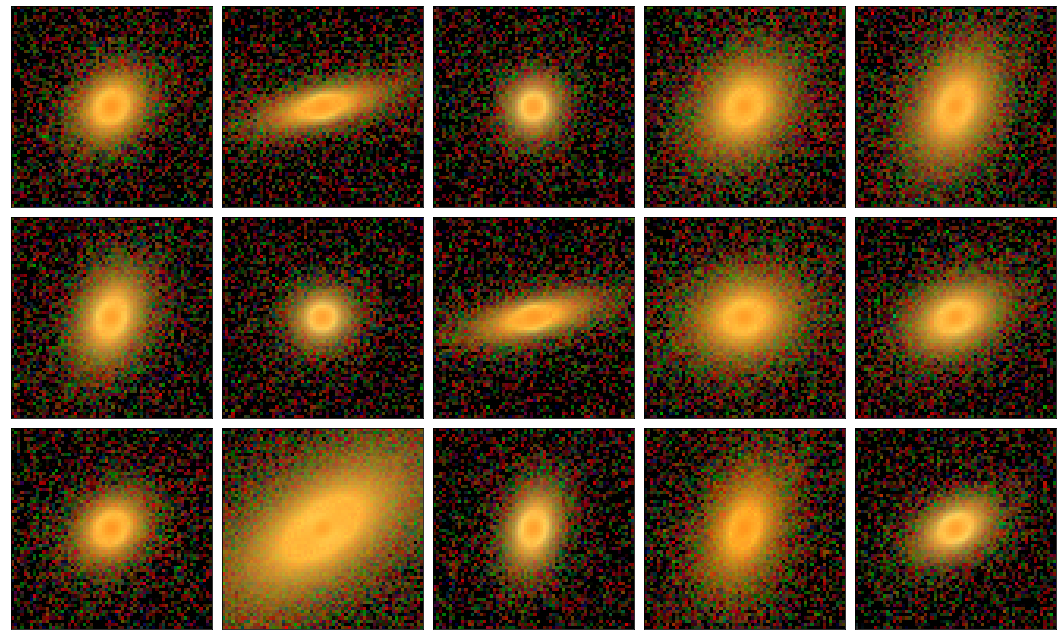

In [36]:
from astropy.visualization import make_lupton_rgb
n_horizont, n_vertical = 5, 3
f, axes = plt.subplots(n_vertical, n_horizont, figsize=(n_horizont*3, n_vertical*3))


for i in range(n_horizont):
    for j in range(n_vertical):
        kwargs_source = lenstronomy_config(pipeline, mag_cut=22, z_min=0.8, z_max=2, galaxy_type='blue', position_scatter=0.5)
        kwargs_lens_light = lenstronomy_config(pipeline, mag_cut=20, z_min=0.1, z_max=0.4, galaxy_type='red', position_scatter=0)

        # turn magnitude kwargs into lenstronomy kwargs
        kwargs_lens_light_g, kwargs_source_g, kwargs_ps_g = sim_g.magnitude2amplitude(kwargs_lens_light[0], kwargs_source[0])
        kwargs_lens_light_r, kwargs_source_r, kwargs_ps_r = sim_r.magnitude2amplitude(kwargs_lens_light[1], kwargs_source[1])
        kwargs_lens_light_i, kwargs_source_i, kwargs_ps_i = sim_i.magnitude2amplitude(kwargs_lens_light[2], kwargs_source[2])

        image_g = imSim_g.image(kwargs_lens, kwargs_source_g, kwargs_lens_light_g, kwargs_ps_g)
        image_r = imSim_r.image(kwargs_lens, kwargs_source_r, kwargs_lens_light_r, kwargs_ps_r)
        image_i = imSim_i.image(kwargs_lens, kwargs_source_i, kwargs_lens_light_i, kwargs_ps_i)

        # add noise
        image_g += sim_g.noise_for_model(model=image_g)
        image_r += sim_r.noise_for_model(model=image_r)
        image_i += sim_i.noise_for_model(model=image_i)

        # use color with astropy
        image = make_lupton_rgb(image_i, image_r, image_g, stretch=0.5)
        
        # and plot it
        ax = axes[j, i]
        ax.imshow(image, aspect='equal', origin='lower')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.autoscale(False)


f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

### Brightness~0 (relation between flux)

In [37]:
def lenstronomy_config(pipeline, mag_cut=25, z_min=0.5, z_max=2, galaxy_type='blue', position_scatter=0.5):
    """
    keyword arguments of lenstronomy Sersic function selected from the skypy catalogue
    """
    source_cut = (pipeline[galaxy_type]['z'] > z_min) & (pipeline[galaxy_type]['z'] < z_max) & (pipeline[galaxy_type]['mag_g'] < mag_cut)
    pipeline_cut = pipeline[galaxy_type][source_cut]
    n = len(pipeline_cut)
    index = random.randint(0, n-1)
    source = pipeline_cut[index]

    size_arcsec = source['angular_size'] / constants.arcsec  # convert radian to arc seconds
    mag_g, mag_r, mag_i = source['mag_g'], source['mag_r'], source['mag_i']
    mag_apparent = source['M']
    e = source['ellipticity']
    phi = np.random.uniform(0, np.pi)
    e1 = e * np.cos(phi)
    e2 = e * np.sin(phi)
    if galaxy_type == 'blue':
        n_sersic = 1
    else:
        n_sersic = 4
    center_x, center_y = np.random.uniform(-position_scatter, position_scatter), np.random.uniform(-position_scatter, position_scatter)
    kwargs_galaxy_g = [{'magnitude': 0, 'R_sersic': size_arcsec, 'n_sersic': n_sersic, 
                     'e1': e1, 'e2': e2, 'center_x': center_x, 'center_y': center_y}]
    kwargs_galaxy_r = [{'magnitude': 0, 'R_sersic': size_arcsec, 'n_sersic': n_sersic, 
                     'e1': e1, 'e2': e2, 'center_x': center_x, 'center_y': center_y}]
    kwargs_galaxy_i = [{'magnitude': 0, 'R_sersic': size_arcsec, 'n_sersic': n_sersic, 
                     'e1': e1, 'e2': e2, 'center_x': center_x, 'center_y': center_y}]
    return [kwargs_galaxy_g, kwargs_galaxy_r, kwargs_galaxy_i]

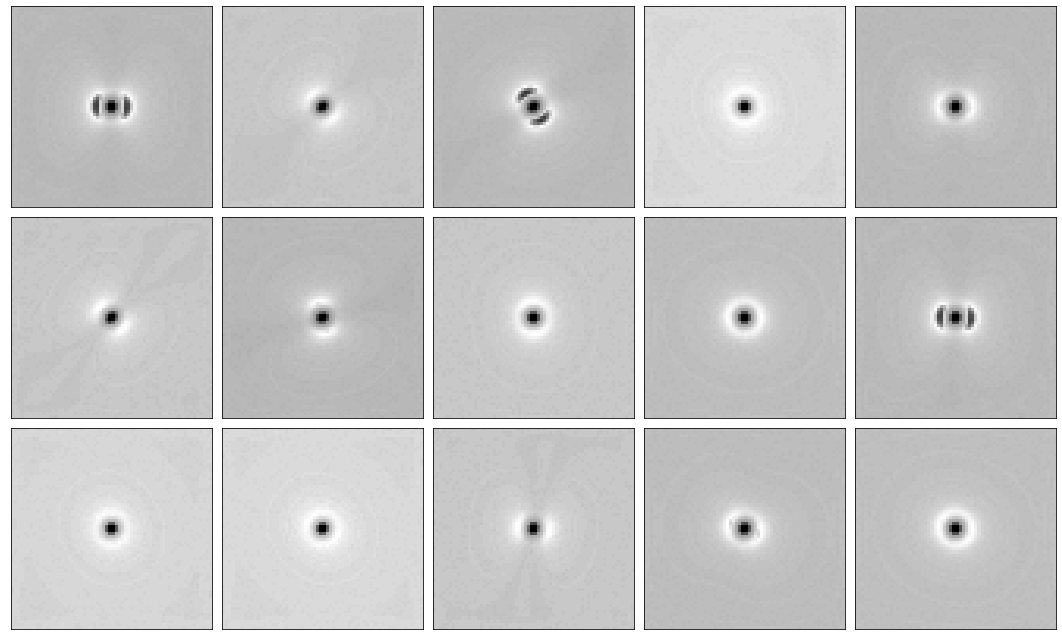

In [38]:
from astropy.visualization import make_lupton_rgb
n_horizont, n_vertical = 5, 3
f, axes = plt.subplots(n_vertical, n_horizont, figsize=(n_horizont*3, n_vertical*3))


for i in range(n_horizont):
    for j in range(n_vertical):
        kwargs_source = lenstronomy_config(pipeline, mag_cut=22, z_min=0.8, z_max=2, galaxy_type='blue', position_scatter=0.5)
        kwargs_lens_light = lenstronomy_config(pipeline, mag_cut=20, z_min=0.1, z_max=0.4, galaxy_type='red', position_scatter=0)

        # turn magnitude kwargs into lenstronomy kwargs
        kwargs_lens_light_g, kwargs_source_g, kwargs_ps_g = sim_g.magnitude2amplitude(kwargs_lens_light[0], kwargs_source[0])
        kwargs_lens_light_r, kwargs_source_r, kwargs_ps_r = sim_r.magnitude2amplitude(kwargs_lens_light[1], kwargs_source[1])
        kwargs_lens_light_i, kwargs_source_i, kwargs_ps_i = sim_i.magnitude2amplitude(kwargs_lens_light[2], kwargs_source[2])

        image_g = imSim_g.image(kwargs_lens, kwargs_source_g, kwargs_lens_light_g, kwargs_ps_g)
        image_r = imSim_r.image(kwargs_lens, kwargs_source_r, kwargs_lens_light_r, kwargs_ps_r)
        image_i = imSim_i.image(kwargs_lens, kwargs_source_i, kwargs_lens_light_i, kwargs_ps_i)

        # add noise
        image_g += sim_g.noise_for_model(model=image_g)
        image_r += sim_r.noise_for_model(model=image_r)
        image_i += sim_i.noise_for_model(model=image_i)

        # use color with astropy
        image = make_lupton_rgb(image_i, image_r, image_g, stretch=0.5)
        image = np.sum(image, axis=-1)
        
        # and plot it
        ax = axes[j, i]
        ax.imshow(image, aspect='equal', origin='lower', cmap="gray")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.autoscale(False)


f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()